In [1]:
import armageddon.mse as mse
import armageddon as ar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Find the influence of separete parameter

In [2]:
# fiducial value
fid_r = 9
fid_strength = 1e6

radius = np.linspace(5,20,10)
strength = 10**np.arange(3,9)

basic_DF = pd.read_csv('data/ChelyabinskEnergyAltitude.csv')
basic_DF = basic_DF.loc[basic_DF.iloc[:,1]>5]
basic_z, basic_ek = basic_DF.iloc[:,0].to_numpy(), basic_DF.iloc[:,1].to_numpy()

Text(0, 0.5, 'Altitude (m)')

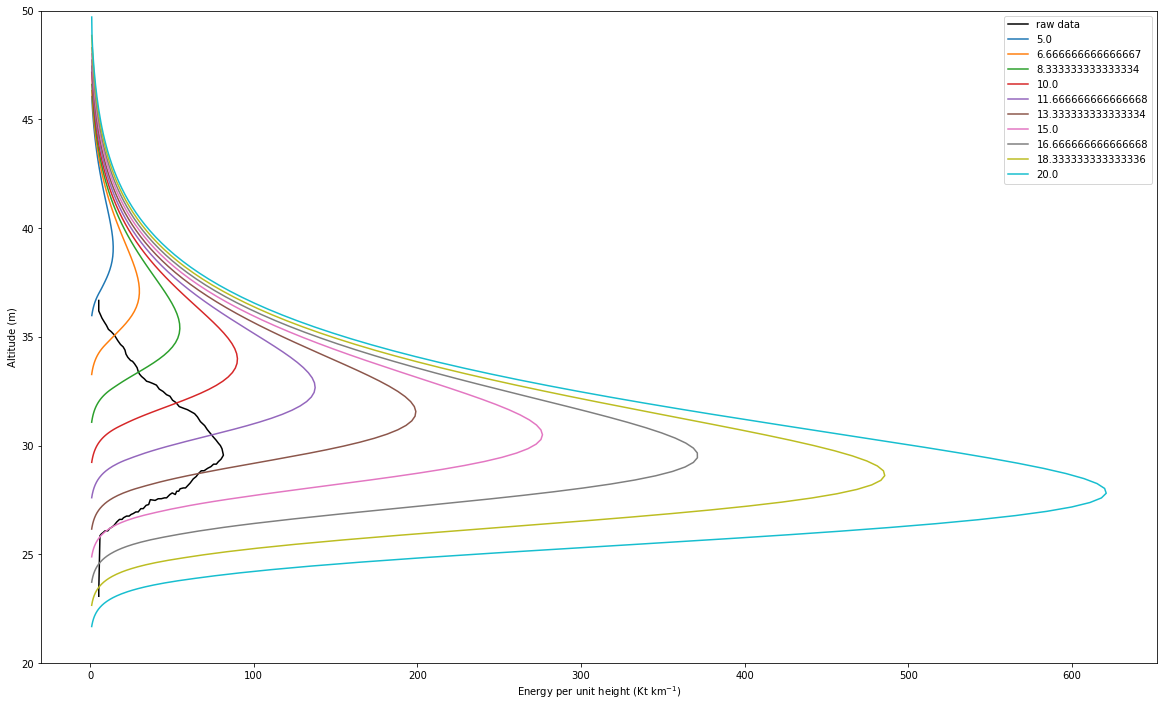

In [3]:
earth = ar.Planet()
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
for r in radius:
    com_z, com_ek = mse.fit_out(earth, r, fid_strength)
    if com_z is not None:
        plt.plot(com_ek, com_z, label=str(r))
plt.ylim(20,50)
plt.legend()
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')

from the figure, we can infer that as the radius increase, the break-up point is not changed. total energy increases as the radius inrease.

So we can conclude the radius falls in range(8 ~ 10)

Text(0, 0.5, 'Altitude (m)')

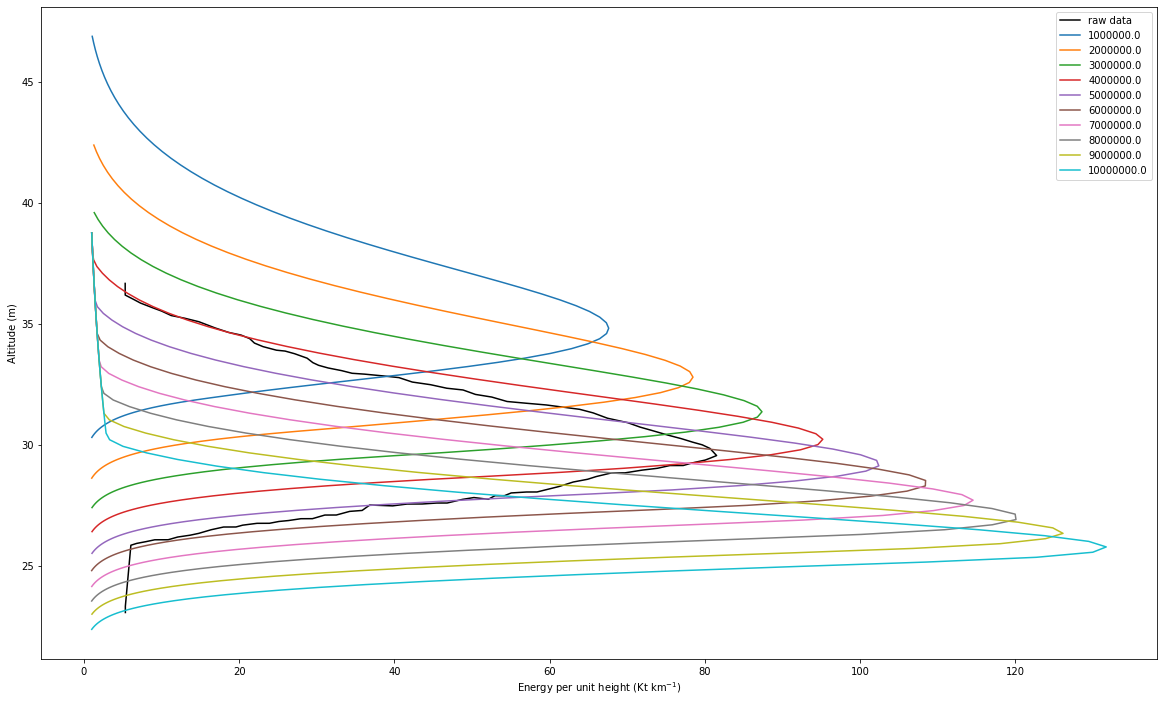

In [4]:
earth = ar.Planet()
strength = np.linspace(1e6,1e7,10)
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
for s in strength:
    com_z, com_ek = mse.fit_out(earth, fid_r, s)
    if com_z is not None:
        plt.plot(com_ek, com_z, label=str(s))
plt.legend()
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')

from the figure, we can infer that as the strength increase, the break-up point decreases. total energy increases as the strength inrease.

Meanwhile, we can conclude the influence by radius of burst altitude is less than strength of burst altitude.

So we can conclude the strength falls in range(1e6 ~ 1e7)

then we create the 100 combinations of radius and strength by meshgrid to find the best pair of parameters by calculate the error function, which calculate the the square distance between burst points of fit model and raw data.

In [5]:
earth = ar.Planet()
radius = np.linspace(8,10,10)
strength = np.linspace(1e6,1e7,10)
com = np.array(np.meshgrid(radius, strength)).reshape(2,100)

mse_arr = np.zeros(100)
for i in range(com.shape[1]):
    m = mse.calculate_mse(earth, com[0,i], com[1,i])
    if m is None:
        m = np.inf
    mse_arr[i] = m

best radius = 8.222222222222221
best strength = 5.0e+06


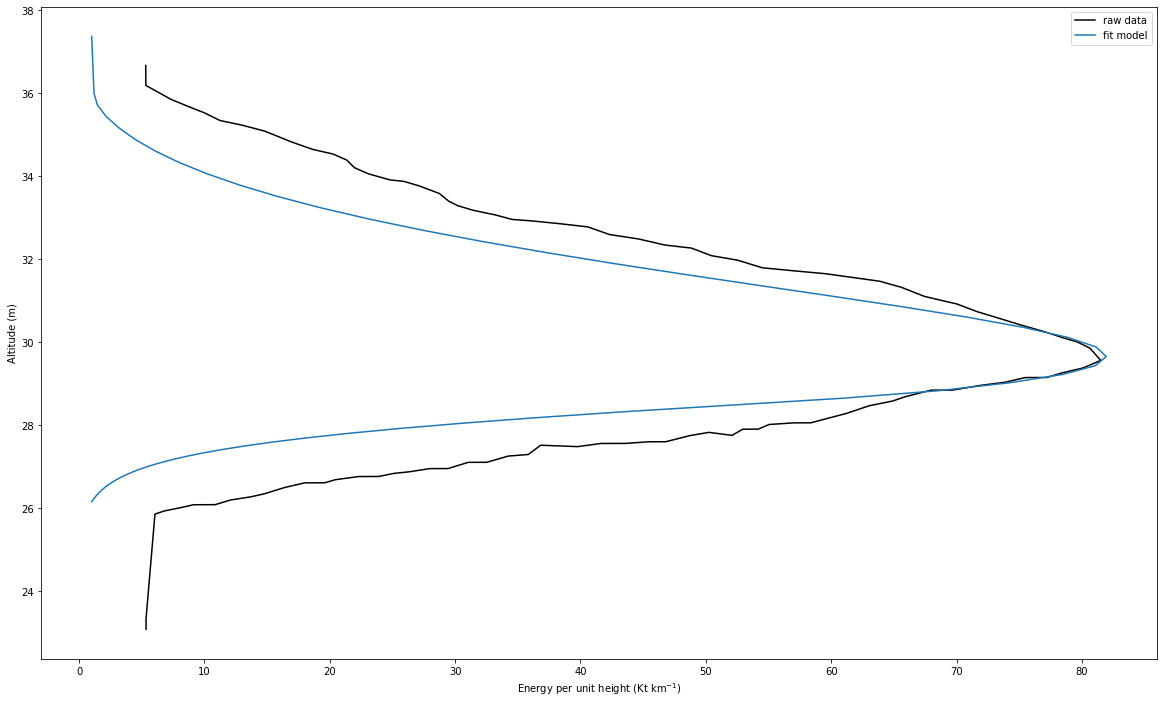

In [7]:
earth = ar.Planet()
min_mse = np.min(mse_arr)
min_index = np.argmin(mse_arr)
r_best = radius[min_index%10]
str_best = strength[min_index//10]
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
com_z, com_ek = mse.fit_out(earth, r_best, str_best)
plt.plot(com_ek, com_z, label='fit model')
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')
plt.legend()
print('best radius =', r_best)
print('best strength = %.1e' %str_best)

In [8]:
min_mse

0.19777602597677013

best radius = 8.222222222222221
best strength = 5.0e+06


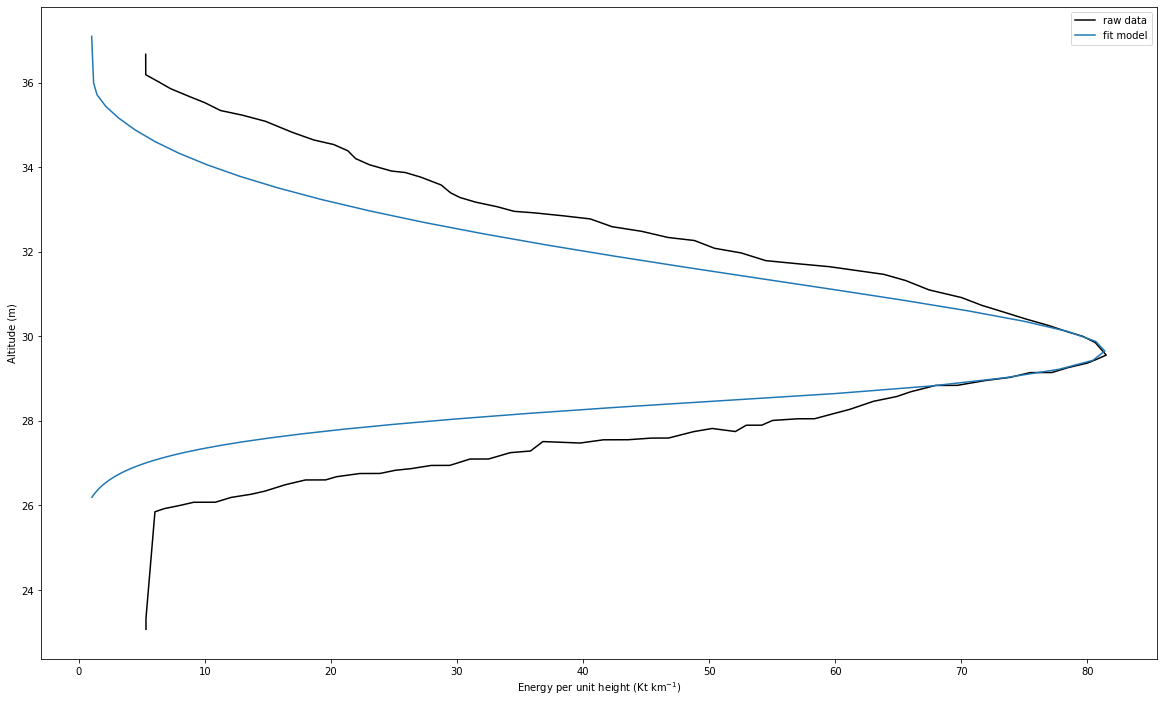

In [11]:
earth = ar.Planet()
fig = plt.subplots(figsize=(20,12))
plt.plot(basic_ek, basic_z,'k-', label='raw data')
com_z, com_ek = mse.fit_out(earth, 8.2, 5e6)
plt.plot(com_ek, com_z, label='fit model')
plt.xlabel('Energy per unit height (Kt km$^{-1}$)')
plt.ylabel('Altitude (m)')
plt.legend()
print('best radius =', r_best)
print('best strength = %.1e' %str_best)